# Van Kampen 1.7. The central limit theorem(CLT)

특정 process를 매번 반복할 때, 이것이 일어나는 확률 분포 함수가 매번 같은 경우에 대해서,

average와 variance가 finite한 경우라면,

이를 매우 여러번 반복하게 되면,

이것이 gaussian distribution function을 따르게 된다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coin(n):
    result = np.round(np.random.rand(n),0)
    return result

print(coin(10))

[1. 1. 1. 1. 0. 0. 0. 1. 1. 0.]


In [3]:
def Y(n,r,bin_num):
    '''
    n : 던지는 동전의 개수
    r : 던지는 횟수
    bin_num : 히스토그램을 그릴 때 자르는 영역의 개수
    '''
    value = np.zeros(n)

    for i in range(0,r):
        value += coin(n)
    
    result,bins = np.histogram(value,bins = bin_num, density = True)
    
    return bins[:-1], result

        

r value is 1000


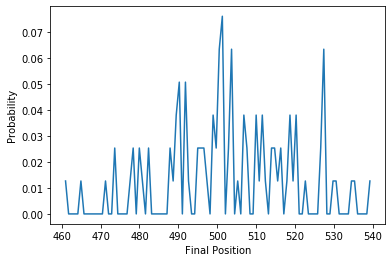

r value is 10000


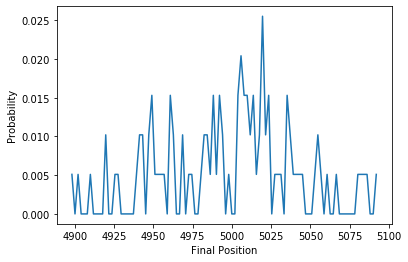

r value is 100000


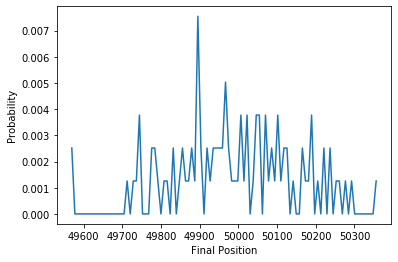

r value is 1000000


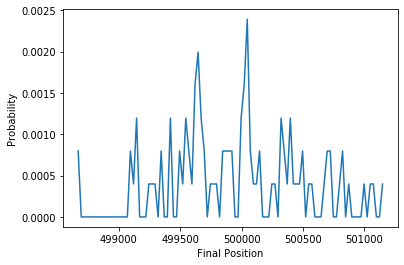

In [4]:
for i in range(3,7):
    final_position, probability = Y(100,10**i,100)
    plt.plot(final_position, probability)
    plt.xlabel('Final Position')
    plt.ylabel('Probability')
    print('r value is',10**i)
    plt.show()

시행해보는 coin의 개수 (n)이 충분히 크지 않다면, 아무리 하나의 coin에 대해 여러번 coin toss를 해도 소용이 없다..!

num value is 1000


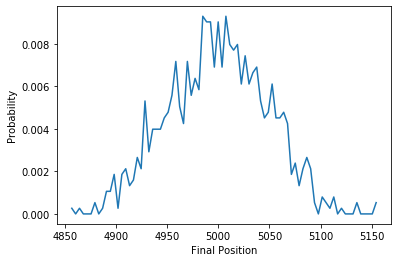

num value is 10000


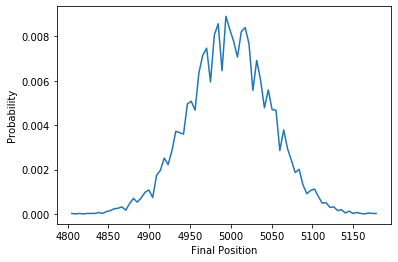

num value is 100000


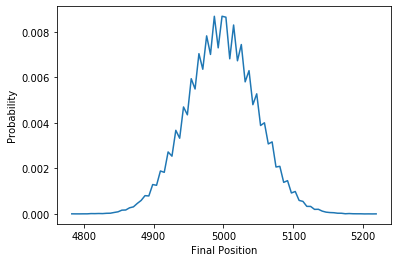

In [11]:
for i in range(3,6):
    final_position, probability = Y(10**i,10000,80)
    plt.plot(final_position, probability)
    plt.xlabel('Final Position')
    plt.ylabel('Probability')
    print('num value is',10**i)
    plt.show()

# Coin Toss를 하는 coin의 개수가 증가할수록, 단순히 Binomial한 경우가 점점 Gaussian에 가까워짐을 볼 수 있다.

# Fitting을 해보자

# Van Kampen 책의 eq (7.7)을 사용.!

In [12]:
def gauss(x,M):
    return np.sqrt(1/2*M*3.14)**-1*np.exp(-(x-1/2*M)**2/(1/2*M))

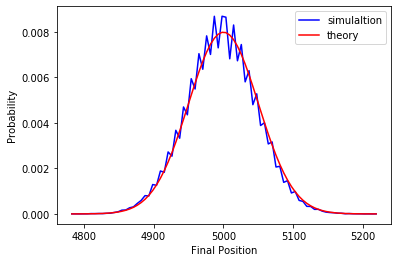

In [13]:
plt.plot(final_position, probability,'b-', label = 'simulaltion')
plt.plot(final_position,gauss(final_position,10000),'r-', label = 'theory')
plt.xlabel('Final Position')
plt.ylabel('Probability')
plt.legend(loc = 'best')